# In this program we intend to find out homophily based on centralilty measures of a network.

In [1]:
import networkx as nx 
import csv
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Creating a directed graph of the network
G = nx.DiGraph()
edge_file = open('data/edges.edges', mode='r')
for rows in edge_file:
    edges = rows.strip().split()
    G.add_edge(int(edges[0]),int(edges[1]))
edge_file.close()

In [3]:
# Function to plot graph
def plotGraph(allGroup,centralityName):
    groupName = []
    totalUserCount = []
    allUserConnection = {}
    for groups in allGroup:
        userConnection = {}
        groupVal  = allGroup[groups]
        for user in groupVal:
            edges = list(G.out_edges(int(user)))
            userConCount = 0
            alreadyCounted = []
            for edge in edges:
                if(edge[1] in groupVal and edge[1] not in alreadyCounted):
                    userConCount+=1
                    alreadyCounted.append(edge[1])
            userConnection[user] = userConCount
        x = ['Min','Max']
        minVal = 0
        maxVal = 0
        if(userConnection.values()):
            minVal = min(userConnection.values())
            maxVal = max(userConnection.values())
        y = [minVal,maxVal]
        plt.plot(x,y,label = groups)

    plt.xlabel("Connection scale")  
    plt.ylabel("User Connection count") 
    plt.title("Connection count of group of user sharing similar "+ str(centralityName)+" centrality") 
    plt.legend()
    plt.show()

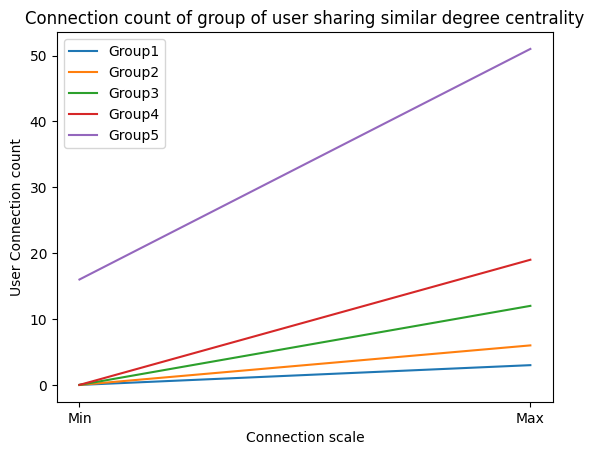

From the above graph we can see that having similar degree centrality doesn't result in connection of the user, but with increasing value of degree centrality we can see the connection grow. So we can conclude that with degree centrality, higher the value more there is a change of connection


In [4]:
# Homophily based on degree centrality
degree = nx.degree_centrality(G)
sortedValue = dict(sorted(degree.items(), key=lambda item: item[1]))
group1,group2,group3,group4,group5 = ([] for i in range(5))
for val in sortedValue:
    if(sortedValue[val] > 0 and sortedValue[val] < 0.025):
        group1.append(val)
    elif(sortedValue[val] > 0.025 and sortedValue[val] < 0.07):
        group2.append(val)
    elif(sortedValue[val] > 0.07 and sortedValue[val] < 0.2):
        group3.append(val)        
    elif(sortedValue[val] > 0.2 and sortedValue[val] < 0.4):
        group4.append(val)    
    elif(sortedValue[val] > 0.4):
        group5.append(val) 
allGroup = {'Group1':group1,'Group2':group2,'Group3':group3,'Group4':group4,'Group5':group5}
plotGraph(allGroup,'degree')
print("From the above graph we can see that having similar degree centrality doesn't result in connection of the user, but with increasing value of degree centrality we can see the connection grow. So we can conclude that with degree centrality, higher the value more there is a change of connection")

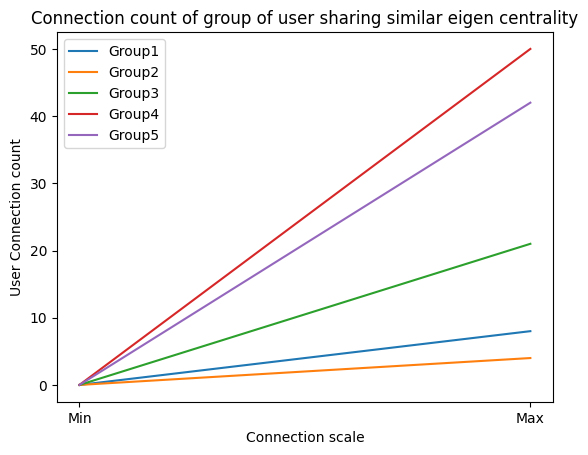

From the above graph we get similar results as degree centrality, with increasing value of eigen centrality we can see the connection grow. So we can conclude that with eigen centrality also, higher the value more there is a change of connection


In [5]:
# Homophily based on eigen centrality
eigen = nx.eigenvector_centrality(G)
sortedEigen = dict(sorted(eigen.items(), key=lambda item: item[1]))
group1,group2,group3,group4,group5 = ([] for i in range(5))

for val in sortedEigen:
    if(sortedEigen[val] > 0 and sortedEigen[val] < 1e-4):
        group1.append(val)
    elif(sortedEigen[val] >  1e-4 and sortedEigen[val] < 0.005):
        group2.append(val)
    elif(sortedEigen[val] > 0.005 and sortedEigen[val] < 0.05):
        group3.append(val)        
    elif(sortedEigen[val] > 0.05 and sortedEigen[val] < 0.1):
        group4.append(val)    
    elif(sortedEigen[val] > 0.1 ):
        group5.append(val)
allGroup = {'Group1':group1,'Group2':group2,'Group3':group3,'Group4':group4,'Group5':group5}
plotGraph(allGroup,'eigen')
print('From the above graph we get similar results as degree centrality, with increasing value of eigen centrality we can see the connection grow. So we can conclude that with eigen centrality also, higher the value more there is a change of connection')

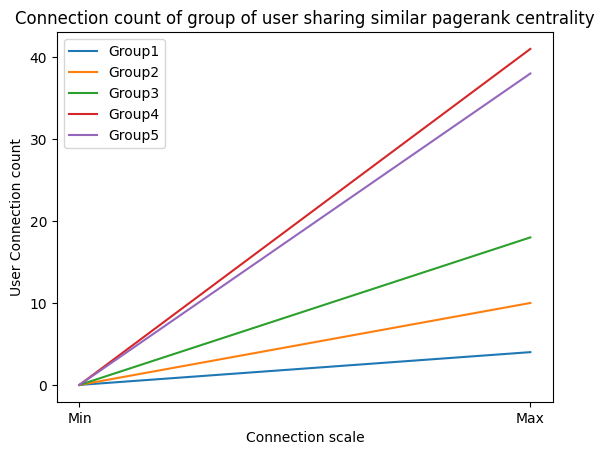

For pagerank centrality as well, we get the similar results. With increasing value of pagerank centrality we can see the connection grow.


In [6]:
# Homophily based on pagerank centrality
pagerank = nx.pagerank(G, alpha = 0.8)
sortedPageRank = dict(sorted(pagerank.items(), key=lambda item: item[1]))
group1,group2,group3,group4,group5 = ([] for i in range(5))
for val in sortedPageRank:
    if(sortedPageRank[val] > 0 and sortedPageRank[val] < 0.0018):
        group1.append(val)
    elif(sortedPageRank[val] > 0.0018 and sortedPageRank[val] < 0.0028):
        group2.append(val)
    elif(sortedPageRank[val] > 0.0028 and sortedPageRank[val] < 0.0038):
        group3.append(val)        
    elif(sortedPageRank[val] > 0.0038 and sortedPageRank[val] < 0.0055):
        group4.append(val)    
    elif(sortedPageRank[val] > 0.0055):
        group5.append(val) 
        
allGroup = {'Group1':group1,'Group2':group2,'Group3':group3,'Group4':group4,'Group5':group5}
plotGraph(allGroup,'pagerank')
print('For pagerank centrality as well, we get the similar results. With increasing value of pagerank centrality we can see the connection grow.')

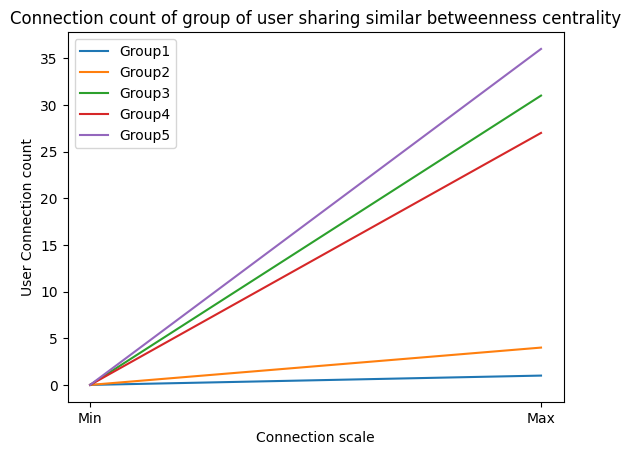

For betweeness centrality as well, we get the similar results. With increasing value of betweeness centrality we can see the connection grow.


In [7]:
# Homophily based on betweenness centrality
betweenness = nx.betweenness_centrality(G, normalized = True, endpoints = False)
sortedBetweenness = dict(sorted(betweenness.items(), key=lambda item: item[1]))
group1,group2,group3,group4,group5 = ([] for i in range(5))
for val in sortedBetweenness:
    if(sortedBetweenness[val] == 0 ):
        group1.append(val)
    elif(sortedBetweenness[val] > 0 and sortedBetweenness[val] < 4e-4):
        group2.append(val)
    elif(sortedBetweenness[val] > 4e-4 and sortedBetweenness[val] < 0.0025):
        group3.append(val)        
    elif(sortedBetweenness[val] > 0.0025 and sortedBetweenness[val] < 0.007):
        group4.append(val)    
    elif(sortedBetweenness[val] > 0.007):
        group5.append(val) 
allGroup = {'Group1':group1,'Group2':group2,'Group3':group3,'Group4':group4,'Group5':group5}
plotGraph(allGroup,'betweenness')
print('For betweeness centrality as well, we get the similar results. With increasing value of betweeness centrality we can see the connection grow.')

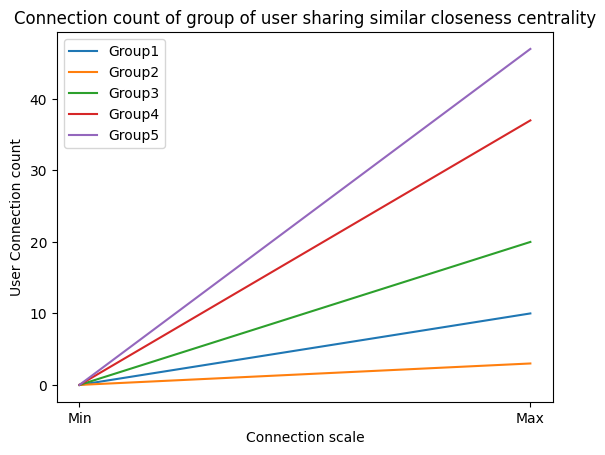

For closeness centrality as well, we get the similar results. With increasing value of closeness centrality we can see the connection grow.


In [8]:
# Homophily based on closeness centrality
closeness = nx.closeness_centrality(G)
sortedCloseness = dict(sorted(closeness.items(), key=lambda item: item[1]))
group1,group2,group3,group4,group5 = ([] for i in range(5))
for val in sortedCloseness:
    if(sortedCloseness[val] > 0 and sortedCloseness[val] < 0.25 ):
        group1.append(val)
    elif(sortedCloseness[val] > 0.25 and sortedCloseness[val] < 0.3):
        group2.append(val)
    elif(sortedCloseness[val] > 0.3 and sortedCloseness[val] < 0.34):
        group3.append(val)        
    elif(sortedCloseness[val] > 0.34 and sortedCloseness[val] < 0.37):
        group4.append(val)    
    elif(sortedCloseness[val] > 0.37):
        group5.append(val) 
allGroup = {'Group1':group1,'Group2':group2,'Group3':group3,'Group4':group4,'Group5':group5}
plotGraph(allGroup,'closeness')
print('For closeness centrality as well, we get the similar results. With increasing value of closeness centrality we can see the connection grow.')

# With the results from all the centrality, we can conclude that having similar centrality doesn't result in having connection between those user. But highers the centrality more is the chance of connection between the users